In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import imageio
import os

In [2]:
os.mkdir('bfs')

In [3]:
def display_gif(fn):
    from IPython import display
    return display.HTML('<img src="{}">'.format(fn))

In [4]:
class Graph:
    def __init__(self, n):
        self.n = n
        self.adjmat = []
        
        for i in range(n):
            self.adjmat.append([0 for j in range(n)])
        
        self.g = nx.Graph()
    
    def addedge(self, u, v):
        self.adjmat[u][v] = 1
        self.adjmat[v][u] = 1
        self.g.add_edge(u, v, weight=1)
        
    def visualize(self):
        pos = nx.kamada_kawai_layout(self.g)
        nx.draw(self.g, pos, with_labels=False, node_size=150, alpha=0.9)
        plt.show()

In [5]:
def bfs(graph, start):
    traversal = [[start]]
    visitedhist = [[start]]
    
    q = deque()
    q.append(start)
    
    visited = set()
    visited.add(start)
    
    while q:
        node = q.popleft()
             
        for i in range(graph.n):
            if graph.adjmat[node][i] == 1:
                if i not in visited:
                    q.append(i)
                    visited.add(i)
            
        traversal.append(list(q))
        visitedhist.append(list(visited))
            
    return traversal, visitedhist

In [6]:
def creategif(graph, start, name):
    traversal, visited = bfs(graph, start)
    pos = nx.kamada_kawai_layout(graph.g)
    
    frames = []
        
    for i in range(len(traversal)):        
        plt.figure(figsize=(20, 15))
        nx.draw_networkx(graph.g, pos, with_labels=False, node_size=1000, width=6)
        nx.draw_networkx_nodes(graph.g, pos, visited[i], node_size=1000, node_color='b')
        nx.draw_networkx_nodes(graph.g, pos, traversal[i], node_size=1000, node_color='r')
        nx.draw_networkx_nodes(graph.g, pos, [start], node_size=1000, node_color='g')
        plt.savefig(f'./bfs/img_{i}.png', 
                transparent = False,  
                facecolor = 'white'
               )
        plt.close()
        
        image = imageio.v2.imread(f'./bfs/img_{i}.png')
        frames.append(image)
    
    imageio.mimsave(f'./bfsgiphy{name}.gif',
                frames,
                fps = 5)

P:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


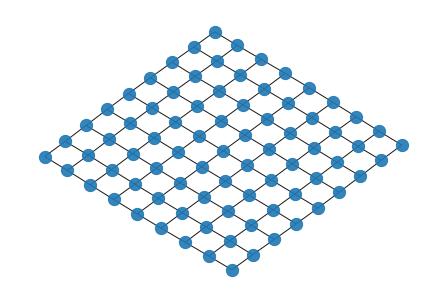

In [7]:
g = Graph(81)

for u in range(72):
    g.addedge(u, u+9)
    
u = 0
while(u < 80):
    if((u+1) % 9 != 0):
        g.addedge(u, u+1)
    u += 1

g.visualize()

In [8]:
creategif(g, 40, 'grid81')
display_gif('bfsgiphygrid81.gif')

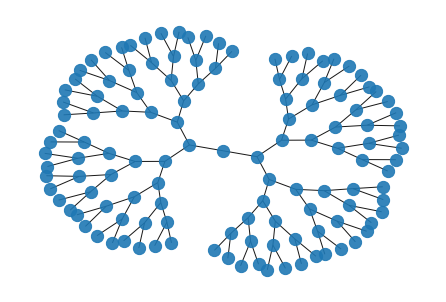

In [9]:
g = Graph(128)

for i in range(63):
    g.addedge(i, 2*i+1)
    g.addedge(i, 2*i+2)
    
g.visualize()

In [10]:
creategif(g, 0, 'tree128')
display_gif('bfsgiphytree128.gif')

In [11]:
import shutil
shutil.rmtree('bfs')